`preprocessing & modeling`

In [4]:
import pandas as pd 
import numpy as np
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
PATH = '/Users/kwonkyoungmi/workspaces/workspace_Python/Git_AtAiffel/datathon/data/MentalHealth'
data = pd.read_csv(os.path.join(PATH,'df_ml.csv'))

### 데이터 탐색 및 전처리

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140480 entries, 0 to 140479
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       140480 non-null  int64  
 1   name                     140480 non-null  object 
 2   gender                   140480 non-null  int64  
 3   age                      140480 non-null  float64
 4   age_group                140480 non-null  object 
 5   profession               140480 non-null  object 
 6   profession_group         140480 non-null  object 
 7   cgpa                     140480 non-null  float64
 8   degree                   140480 non-null  object 
 9   degree_level             140480 non-null  object 
 10  urban_rural              140480 non-null  object 
 11  city                     140480 non-null  object 
 12  work_study_pressure      140480 non-null  float64
 13  work_study_satisfaction  140480 non-null  float64
 14  fina

In [7]:
data['urban_rural'].value_counts()

urban_rural
rural    50958
urban    46609
other    42913
Name: count, dtype: int64

In [8]:
# 머신러닝 모델링에 필요한 컬럼만 추출
df = data[['gender','age_group',
       'profession_group','cgpa','degree_level','urban_rural',
       'sleep_duration','dietary_habits','work_study_hours',
       'work_study_pressure','financial_stress','work_study_satisfaction' ,
       'family_mh_history', 'suicidal_thoughts',
       'depression']]

In [9]:
df.head()

,gender,age_group,profession_group,cgpa,degree_level,urban_rural,sleep_duration,dietary_habits,work_study_hours,work_study_pressure,financial_stress,work_study_satisfaction,family_mh_history,suicidal_thoughts,depression
0,1,46-55,SERV,7.65844,UG,rural,excessive,Healthy,1.0,5.0,2.0,2.0,0,0,0
1,0,26-35,EDU,7.65844,UG,rural,insufficient,Unhealthy,7.0,4.0,3.0,3.0,0,1,1
2,0,26-35,STU,8.97000,UG,rural,insufficient,Healthy,3.0,5.0,1.0,2.0,0,1,1
3,0,18-25,EDU,7.65844,UG,urban,insufficient,Moderate,10.0,5.0,1.0,1.0,1,1,1
4,1,26-35,MGMT,7.65844,UG,other,insufficient,Unhealthy,9.0,1.0,4.0,1.0,1,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140480 entries, 0 to 140479
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender                   140480 non-null  int64  
 1   age_group                140480 non-null  object 
 2   profession_group         140480 non-null  object 
 3   cgpa                     140480 non-null  float64
 4   degree_level             140480 non-null  object 
 5   urban_rural              140480 non-null  object 
 6   sleep_duration           140480 non-null  object 
 7   dietary_habits           140480 non-null  object 
 8   work_study_hours         140480 non-null  float64
 9   work_study_pressure      140480 non-null  float64
 10  financial_stress         140480 non-null  float64
 11  work_study_satisfaction  140480 non-null  float64
 12  family_mh_history        140480 non-null  int64  
 13  suicidal_thoughts        140480 non-null  int64  
 14  depr

In [11]:
## sleep_duration, dietary_habits => 수치형으로 변환

sleep_map = {'insufficient': 0,'optimal': 1,'excessive': 2}
diet_map = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2}

df_1 = df.copy()
df_1['sleep_duration'] = df_1['sleep_duration'].map(sleep_map)
df_1['dietary_habits'] = df_1['dietary_habits'].map(diet_map)

In [12]:
df_1.head()

,gender,age_group,profession_group,cgpa,degree_level,urban_rural,sleep_duration,dietary_habits,work_study_hours,work_study_pressure,financial_stress,work_study_satisfaction,family_mh_history,suicidal_thoughts,depression
0,1,46-55,SERV,7.65844,UG,rural,2,2,1.0,5.0,2.0,2.0,0,0,0
1,0,26-35,EDU,7.65844,UG,rural,0,0,7.0,4.0,3.0,3.0,0,1,1
2,0,26-35,STU,8.97000,UG,rural,0,2,3.0,5.0,1.0,2.0,0,1,1
3,0,18-25,EDU,7.65844,UG,urban,0,1,10.0,5.0,1.0,1.0,1,1,1
4,1,26-35,MGMT,7.65844,UG,other,0,0,9.0,1.0,4.0,1.0,1,1,0


In [13]:
## profession_group, degree_level, urban_rural, age_group => 원핫인코딩
df_2 = pd.get_dummies(df_1, columns=['profession_group', 'degree_level', 'urban_rural', 'age_group'], drop_first=True)

In [24]:
df_2.head()

,gender,cgpa,sleep_duration,dietary_habits,work_study_hours,work_study_pressure,financial_stress,work_study_satisfaction,family_mh_history,suicidal_thoughts,depression,profession_group_CRE,profession_group_EDU,profession_group_ENG,profession_group_MGMT,profession_group_OTH,profession_group_PROF,profession_group_SERV,profession_group_STU,profession_group_TECH,profession_group_UNEMP,degree_level_UG,degree_level_UG-,degree_level_UNK,urban_rural_rural,urban_rural_urban,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65
0,1,7.65844,2,2,1.0,5.0,2.0,2.0,0,0,0,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False
1,0,7.65844,0,0,7.0,4.0,3.0,3.0,0,1,1,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False
2,0,8.97000,0,2,3.0,5.0,1.0,2.0,0,1,1,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False
3,0,7.65844,0,1,10.0,5.0,1.0,1.0,1,1,1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,1,7.65844,0,0,9.0,1.0,4.0,1.0,1,1,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


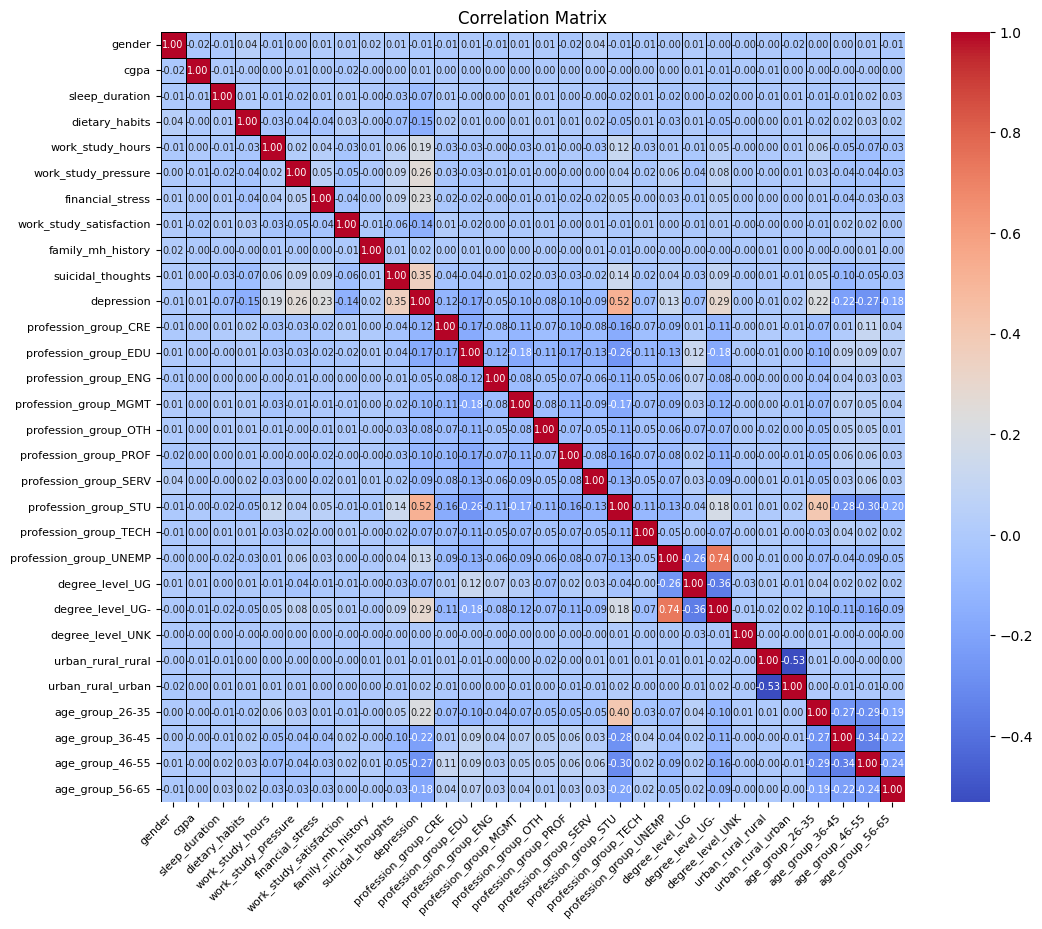

In [15]:
corr_matrix = df_2.corr(method='pearson')

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'fontsize':7}, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.show()

In [16]:
# 상관관계가 높은 컬럼 항목 추출
# 'depression'과 상관관계가 높은 컬럼 추출
corr_depression = corr_matrix['depression'].sort_values(ascending=False).abs()
print("Columns highly correlated with 'depression':")
print(corr_depression[corr_depression.abs() > 0.3])

Columns highly correlated with 'depression':
depression              1.000000
profession_group_STU    0.520707
suicidal_thoughts       0.349103
Name: depression, dtype: float64


In [17]:
df_2.corr(method='pearson').abs().unstack().sort_values(ascending=False).drop_duplicates().head(10)

profession_group_PROF  profession_group_PROF     1.000000
degree_level_UG-       profession_group_UNEMP    0.735656
urban_rural_urban      urban_rural_rural         0.531631
depression             profession_group_STU      0.520707
profession_group_STU   age_group_26-35           0.402111
degree_level_UG        degree_level_UG-          0.356312
depression             suicidal_thoughts         0.349103
age_group_36-45        age_group_46-55           0.342078
age_group_46-55        profession_group_STU      0.303868
degree_level_UG-       depression                0.293516
dtype: float64

### 데이터 나누기

In [18]:
from sklearn.model_selection import train_test_split

# X, y 데이터 분리
X = df_2.drop(['depression'], axis=1)
y = df_2['depression']

# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [19]:
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(126432, 29), 테스트 세트 Shape:(14048, 29)
 학습 세트 레이블 값 분포 비율
depression
0    0.818321
1    0.181679
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
depression
0    0.818337
1    0.181663
Name: count, dtype: float64


### ML

In [20]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2, random_state=0, stratify=y_train)

#### 로지스틱 회귀

In [21]:
# 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000, random_state=0)
lr_clf.fit(X_tr, y_tr)
# 검증 데이터 세트로 예측 수행
y_val_pred = lr_clf.predict(X_val)
# 검증 데이터 세트의 예측 정확도
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
# 혼동 행렬 시각화
cm = confusion_matrix(y_val, y_val_pred)
cm
# Validation Accuracy: 0.9366908395248477


Validation Accuracy: 0.9352631787084272
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     20693
           1       0.84      0.80      0.82      4594

    accuracy                           0.94     25287
   macro avg       0.90      0.88      0.89     25287
weighted avg       0.93      0.94      0.93     25287



array([[19976,   717],
       [  920,  3674]])

In [22]:
# 테스트 데이터 세트로 예측 수행
y_test_pred = lr_clf.predict(X_test)
# 테스트 데이터 세트의 예측 정확도
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
# 혼동 행렬 시각화
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

# Test Accuracy: 0.9369661161731208

Test Accuracy: 0.9392084282460137
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     11496
           1       0.85      0.81      0.83      2552

    accuracy                           0.94     14048
   macro avg       0.90      0.89      0.90     14048
weighted avg       0.94      0.94      0.94     14048



array([[11128,   368],
       [  486,  2066]])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc # ROC AUC 점수 및 커브를 위한 함수
y_pred_proba = lr_clf.predict_proba(X_test)[:, 1] # 양성 클래스(1)에 대한 예측 확률
roc_auc = roc_auc_score(y_test, y_pred_proba) # ROC AUC 점수 계산
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9733400693549126


In [25]:
# 피처 중요도 추출
# 로지스틱 회귀 모델의 계수를 추출하여 피처 중요도를 계산
coefficients = lr_clf.coef_[0] # 이진 분류의 경우 model.coef_는 2D 배열 (클래스 수 x 피처 수)
feature_names = X.columns
# 피처 이름과 계수를 데이터프레임으로 변환
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
# 계수를 절대값 기준으로 정렬
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False).reset_index(drop=True)

coef_df.head(15)
#coef_df.to_csv(os.path.join(PATH, 'regression.csv'), index=False)

,Feature,Coefficient,abs_coefficient
0,age_group_56-65,-5.566825,5.566825
1,age_group_46-55,-4.288114,4.288114
2,age_group_36-45,-3.056212,3.056212
3,suicidal_thoughts,2.442757,2.442757
4,profession_group_STU,2.022217,2.022217
5,age_group_26-35,-0.903424,0.903424
6,profession_group_UNEMP,0.736476,0.736476
7,work_study_pressure,0.716493,0.716493
8,profession_group_ENG,0.607949,0.607949
9,financial_stress,0.550503,0.550503


#### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rf_clf = RandomForestClassifier(
    n_estimators=200,           # 포레스트 안의 결정 트리 개수 (기본값: 100)
    criterion='entropy',           # 분할 품질을 측정하는 기능 (기본값: 'gini' for classification, 'entropy')
    max_depth=None,             # 트리의 최대 깊이 (기본값: None, 제한 없음)
    min_samples_split=2,        # 노드를 분할하기 위한 최소 샘플 수 (기본값: 2)
    min_samples_leaf=1,         # 리프 노드가 되기 위한 최소 샘플 수 (기본값: 1)
    min_weight_fraction_leaf=0.0, # 리프 노드의 최소 가중치 분할 (기본값: 0.0)
    max_features='sqrt',        # 각 노드에서 분할에 사용할 피처의 최대 개수 (기본값: 'sqrt' for classification)
    max_leaf_nodes=None,        # 리프 노드의 최대 개수 (기본값: None, 제한 없음)
    min_impurity_decrease=0.0,  # 분할이 최소한 이 값만큼 불순도를 감소시켜야 함 (기본값: 0.0)
    bootstrap=True,             # 각 트리를 학습할 때 부트스트랩 샘플링 사용 여부 (기본값: True)
    oob_score=False,            # Out-Of-Bag 샘플을 사용하여 일반화 점수 추정 여부 (기본값: False)
    n_jobs=-1,                 # 병렬 처리할 CPU 코어 수 (기본값: None, 1을 의미; -1은 모든 코어 사용)
    #random_state=42,            # 난수 시드 (재현 가능성을 위해 설정)
    verbose=1,                  # 모델 학습 중 메시지 출력 레벨 (기본값: 0)
    warm_start=False,           # fit 호출 시 이전 호출의 솔루션을 재사용할지 여부 (기본값: False)
    class_weight=None,          # 클래스 불균형 처리 (기본값: None)
    ccp_alpha=0.0,              # 최소 비용-복잡도 가지치기 매개변수 (기본값: 0.0)
    max_samples=None            # 부트스트랩 샘플링 시 샘플링할 최대 샘플 수 (기본값: None, 전체 샘플 수 사용)
)
rf_clf.fit(X_tr, y_tr)
# 검증 데이터 세트로 예측 수행
y_val_pred = rf_clf.predict(X_val)
# 검증 데이터 세트의 예측 정확도
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
# 검증 데이터 세트의 분류 보고서
print("Classification Report:\n", classification_report(y_val, y_val_pred))
cm = confusion_matrix(y_val, y_val_pred)
cm
# Validation Accuracy: 0.9335320549895448

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   32.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.9s finished


Validation Accuracy: 0.9335320549895448
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     18394
           1       0.85      0.77      0.81      4083

    accuracy                           0.93     22477
   macro avg       0.90      0.87      0.88     22477
weighted avg       0.93      0.93      0.93     22477



array([[17822,   572],
       [  922,  3161]])

In [66]:
# Stratified Kfold
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    print(accuracy_score(y_test, pred))

0.9332645216400911
0.9326594533029613
0.9320543849658315
0.9327306378132119
0.9333001138952164


In [ ]:
# 테스트 데이터 세트로 예측 수행    
y_test_pred = rf_clf.predict(X_test)
# 테스트 데이터 세트의 예측 정확도
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# 테스트 데이터 세트의 분류 보고서
print("Classification Report:\n", classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
cm_test
# Test Accuracy: 0.9757260820045558
# Test Accuracy: 0.9343322892938497

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.9s finished


Test Accuracy: 0.9343322892938497
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     22991
           1       0.85      0.78      0.81      5105

    accuracy                           0.93     28096
   macro avg       0.90      0.87      0.89     28096
weighted avg       0.93      0.93      0.93     28096



array([[22292,   699],
       [ 1146,  3959]])

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve, auc # ROC AUC 점수 및 커브를 위한 함수
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1] # 양성 클래스(1)에 대한 예측 확률
roc_auc = roc_auc_score(y_test, y_pred_proba) # ROC AUC 점수 계산
print("ROC AUC Score:", roc_auc)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s


ROC AUC Score: 0.9926064071999215


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


In [143]:
# 피처 중요도 추출
importances = rf_clf.feature_importances_  # 피처 중요도 추출
feature_names = X.columns
# 피처 이름과 중요도를 데이터프레임으로 변환
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# 중요도를 기준으로 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
# 상위 10개의 피처 출력
importances_df.head(15)
#importances_df.to_csv(os.path.join(PATH, 'random_forest.csv'), index=False)

,Feature,Importance
0,profession_group_STU,0.129826
1,suicidal_thoughts,0.111701
2,work_study_pressure,0.087699
3,cgpa,0.081062
4,work_study_hours,0.077303
5,financial_stress,0.066977
6,age_group_46-55,0.065843
7,work_study_satisfaction,0.055229
8,age_group_56-65,0.041531
9,age_group_36-45,0.040554


#### XGboost

In [ ]:
from xgboost import XGBClassifier

# XGBoost 모델 생성
xgb_clf = XGBClassifier(
    n_estimators=500,           # 트리의 개수 (부스팅 라운드 수). 기본값: 100
    max_depth=6,                # 각 트리의 최대 깊이. 기본값: 6
    learning_rate=0.5,          # 각 부스팅 스텝에 대한 가중치 축소 계수. 기본값: 0.3
    objective='binary:logistic',# 학습할 목적 함수. 이진 분류의 경우 시그모이드 변환 후 확률 예측. 기본값: 'binary:logistic' (이진 분류)
    subsample=1.0,              # 각 트리 구축에 사용할 훈련 샘플의 비율. 기본값: 1.0
    colsample_bytree=1.0,       # 각 트리 구축 시 특성(컬럼)을 무작위로 샘플링하는 비율. 기본값: 1.0
    gamma=0,                    # 트리의 리프 노드에서 추가 분할을 위한 최소 손실 감소 임계값. 기본값: 0
    reg_alpha=0,                # L1 정규화(Lasso) 항 가중치. 기본값: 0
    reg_lambda=1,               # L2 정규화(Ridge) 항 가중치. 기본값: 1
    early_stopping_rounds=10, # 조기 중단을 위한 라운드 수
    eval_metric='error',      # 검증 데이터 세트에 대한 평가 지표. 기본값: 'logloss' (로그 손실)
    random_state=152,            # 재현 가능한 결과를 위한 난수 시드. 기본값: 없음 (설정 권장)
    n_jobs=-1,                 # 병렬 처리할 CPU 코어 수. 기본값: None (1 코어 사용. -1은 모든 코어 사용)
    vervose=True               # 학습 중 진행 상황을 출력할지 여부. 기본값: False
)

# 모델 학습
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=True)
# 검증 데이터 세트로 예측 수행
y_val_pred = xgb_clf.predict(X_val)
# 검증 데이터 세트의 예측 정확도
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
# 검증 데이터 세트의 분류 보고서
print("Classification Report:\n", classification_report(y_val, y_val_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
cm

# Validation Accuracy: 0.9354864223569733
# Validation Accuracy: 0.9348536778275771
# Validation Accuracy: 0.9345553232192908
# array([[29935,  1115],
#       [ 1332,  5548]])

[0]	validation_0-error:0.08519	validation_1-error:0.08689
[1]	validation_0-error:0.08052	validation_1-error:0.08369
[2]	validation_0-error:0.07655	validation_1-error:0.07839


/Users/kwonkyoungmi/.pyenv/versions/3.12.3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [02:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "vervose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[3]	validation_0-error:0.06933	validation_1-error:0.07150
[4]	validation_0-error:0.06779	validation_1-error:0.07003
[5]	validation_0-error:0.06630	validation_1-error:0.06838
[6]	validation_0-error:0.06526	validation_1-error:0.06656
[7]	validation_0-error:0.06450	validation_1-error:0.06642
[8]	validation_0-error:0.06394	validation_1-error:0.06585
[9]	validation_0-error:0.06317	validation_1-error:0.06544
[10]	validation_0-error:0.06330	validation_1-error:0.06611
[11]	validation_0-error:0.06273	validation_1-error:0.06571
[12]	validation_0-error:0.06243	validation_1-error:0.06549
[13]	validation_0-error:0.06219	validation_1-error:0.06562
[14]	validation_0-error:0.06199	validation_1-error:0.06567
[15]	validation_0-error:0.06166	validation_1-error:0.06553
[16]	validation_0-error:0.06143	validation_1-error:0.06558
[17]	validation_0-error:0.06122	validation_1-error:0.06576
[18]	validation_0-error:0.06116	validation_1-error:0.06571
Validation Accuracy: 0.9345553232192908
Classification Report:


array([[17787,   607],
       [  864,  3219]])

In [ ]:
# 테스트 데이터 세트로 예측 수행
y_test_pred = xgb_clf.predict(X_test)
# 테스트 데이터 세트의 예측 정확도
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# 테스트 데이터 세트의 분류 보고서
print("Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

# Test Accuracy: 0.9397779043280182
# Test Accuracy: 0.9338695899772209

Test Accuracy: 0.9338695899772209
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     22991
           1       0.84      0.79      0.81      5105

    accuracy                           0.93     28096
   macro avg       0.90      0.88      0.89     28096
weighted avg       0.93      0.93      0.93     28096



array([[22212,   779],
       [ 1079,  4026]])

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve, auc # ROC AUC 점수 및 커브를 위한 함수
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1] # 양성 클래스(1)에 대한 예측 확률
roc_auc = roc_auc_score(y_test, y_pred_proba) # ROC AUC 점수 계산
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9760584934419042


In [145]:
# 피쳐 중요도 추출
importances = xgb_clf.feature_importances_  # 피처 중요도 추출
feature_names = X.columns
# 피처 이름과 중요도를 데이터프레임으로 변환
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# 중요도를 기준으로 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

importances_df.head(15)
#importances_df.to_csv(os.path.join(PATH, 'xgboost.csv'), index=False)

,Feature,Importance
0,profession_group_STU,0.503200
1,suicidal_thoughts,0.139153
2,age_group_56-65,0.067613
3,profession_group_UNEMP,0.057588
4,age_group_36-45,0.056679
5,age_group_26-35,0.043909
6,age_group_46-55,0.039642
7,work_study_pressure,0.025561
8,financial_stress,0.015814
9,work_study_satisfaction,0.010121


#### lightGBM

In [148]:
from lightgbm import LGBMClassifier
# LightGBM 모델 생성
lgbm_clf = LGBMClassifier(
        objective='binary',          # 학습할 목적 함수. 이진 분류의 기본값. (multi_class_ova, multiclass 등)
        metric='auc',     # 기본 평가 지표. objective에 따라 자동 설정되기도 함. # 이진 분류에서는 'binary_logloss' (logloss), 'auc', 'accuracy' 등을 사용                   
        n_estimators=500,            # 부스팅 라운드 수 (생성할 트리의 개수). 기본값: 100
        learning_rate=0.1,           # 학습률 (각 트리의 기여도를 축소). 기본값: 0.1
        num_leaves=32,               # 하나의 트리가 가질 수 있는 최대 리프 노드 수. 기본값: 31
        max_depth=-1,                # 트리의 최대 깊이. -1은 제한 없음을 의미. 기본값: -1
        min_child_samples=20,        # 리프 노드가 되기 위해 필요한 최소 데이터 수. 기본값: 20
        subsample=1.0,               # 배깅(bagging) 비율. 각 이터레이션에서 사용할 데이터 샘플링 비율. 기본값: 1.0
        subsample_freq=0,            # subsample을 수행할 빈도. 0은 수행 안 함. 기본값: 0
        colsample_bytree=1.0,        # 각 트리 생성 시 컬럼(특성) 샘플링 비율. 기본값: 1.0
        reg_alpha=0.0,               # L1 정규화(Lasso) 항 가중치. 기본값: 0.0
        reg_lambda=0.0,              # L2 정규화(Ridge) 항 가중치. 기본값: 0.0
        random_state=None,           # 재현 가능한 결과를 위한 난수 시드. 기본값: None (설정 권장)
        n_jobs=-1,                   # 병렬 처리할 CPU 코어 수. -1은 모든 코어 사용. 기본값: -1
        boost_from_average=True,     # 초기 예측값을 평균으로 시작할지 여부. 이진 분류에서 True가 기본.
        verbose=-1,                  # 학습 과정 메시지 출력 레벨. -1은 모든 메시지 억제. 기본값: -1
        early_stop_round = 100,      # 조기 중단을 위한 라운드 수. 검증 데이터 세트의 성능이 개선되지 않으면 학습을 중단. 기본값: None
        # is_unbalance=False,        # 불균형 데이터셋 처리 여부. (False가 기본. True로 설정 시 class_weight='balanced'와 유사)
        # scale_pos_weight=None,     # 불균형 데이터셋 처리 시 양성 클래스 가중치.
    )
# 모델 학습
lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])
# 검증 데이터 세트로 예측 수행
y_val_pred = lgbm_clf.predict(X_val)
# 검증 데이터 세트의 예측 정확도
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
# 검증 데이터 세트의 분류 보고서
print("Classification Report:\n", classification_report(y_val, y_val_pred))
cm = confusion_matrix(y_val, y_val_pred)
cm

# Validation Accuracy: 0.9342736620089639
# Validation Accuracy: 0.9343791194305299
# Validation Accuracy: 0.9355785914490368


Validation Accuracy: 0.9355785914490368
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     18394
           1       0.84      0.80      0.82      4083

    accuracy                           0.94     22477
   macro avg       0.90      0.88      0.89     22477
weighted avg       0.93      0.94      0.93     22477



array([[17768,   626],
       [  822,  3261]])

In [149]:
# 모델 테스트
# 테스트 데이터 세트로 예측 수행
y_test_pred = lgbm_clf.predict(X_test)
# 테스트 데이터 세트의 예측 정확도
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# 테스트 데이터 세트의 분류 보고서
print("Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

# Test Accuracy: 0.9481420842824602
# Test Accuracy: 0.9365746013667426

Test Accuracy: 0.9365746013667426
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     22991
           1       0.85      0.80      0.82      5105

    accuracy                           0.94     28096
   macro avg       0.90      0.88      0.89     28096
weighted avg       0.94      0.94      0.94     28096



array([[22253,   738],
       [ 1044,  4061]])

In [121]:
from sklearn.metrics import roc_auc_score, roc_curve, auc # ROC AUC 점수 및 커브를 위한 함수
y_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1] # 양성 클래스(1)에 대한 예측 확률
roc_auc = roc_auc_score(y_test, y_pred_proba) # ROC AUC 점수 계산
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9719607779069193


In [150]:
# 피쳐 중요도 추출
importances = lgbm_clf.feature_importances_  # 피처 중요도 추출
feature_names = X.columns
# 피처 이름과 중요도를 데이터프레임으로 변환
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# 중요도를 기준으로 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
importances_df.head(15)
importances_df.to_csv(os.path.join(PATH, 'lightgbm.csv'), index=False)

In [124]:
# 하이퍼파라미터 튜닝

# 1. 하이퍼 파라미터 검색공간설정
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
params = {
    'num_leaves': hp.randint('num_leaves', 20, 150),          # 하나의 트리가 가질 수 있는 최대 리프 노드 수 (디폴트: 31, 일반적인 탐색 범위: 20~150)
    'max_depth': hp.choice('max_depth', [-1, 5, 10, 15]),    # 트리의 최대 깊이 (디폴트: -1, 제한 없음, 일반적인 탐색 옵션: 5, 10, 15)
    'learning_rate': hp.loguniform('learning_rate', 0.0067, 0.37),  # 학습률 (디폴트: 0.1, 일반적인 탐색 범위: 0.0067 ~ 0.37)
    'min_child_weight': hp.loguniform('min_child_weight', 0.002, 20), # 자식 노드에 필요한 최소 가중치 합 (디폴트: 0.001, 일반적인 탐색 범위: 0.002 ~ 20)
    'min_child_samples': hp.randint('min_child_samples', 10, 100), # 자식 노드에 필요한 최소 데이터 수 (디폴트: 20, 일반적인 탐색 범위: 10~100)
    'subsample': hp.uniform('subsample', 0.7, 1.0),          # 학습 데이터 샘플링 비율 (디폴트: 1.0, 일반적인 탐색 범위: 0.7~1.0)
    'subsample_freq': hp.choice('subsample_freq', [0, 1]),    # subsample 빈도 (디폴트: 0, 옵션: 1 - 매 트리마다 subsample)
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0), # 각 트리 생성 시 컬럼 샘플링 비율 (디폴트: 1.0, 일반적인 탐색 범위: 0.6~1.0)
          }

# 2. 목적 함수 설정 - early_stopping 사용
def objective_func(search_space):
    from lightgbm import early_stopping 
    lgbm_clf = LGBMClassifier(n_estimators=300, # early_stopping을 고려하여 충분히 큰 n_estimators 설정
                            **search_space,
                            n_jobs=-1,
                            importance_type='split',
                            #early_stopping_round=100, # 성능 향상 없는 100라운드 동안 학습 중단
                            #metric='accuracy',
                            boost_from_average=False,
                            #verbose = -1
                            )
    
    from sklearn.model_selection import cross_val_score, StratifiedKFold
    cv = StratifiedKFold(n_splits=3, shuffle=True) # StratifiedKFold 설정 ; 회귀는 KFold(n_splits=3)

    scores = []
    for train_index, val_index in cv.split(X_train, y_train):

        # train_index: 학습 데이터 인덱스, val_index: 검증 데이터 인덱스
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        lgbm_clf.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_train_fold, y_train_fold),(X_val_fold, y_val_fold)],
                  eval_metric='auc', # <--- eval_metric 명시 (필수)
                  callbacks=[early_stopping(stopping_rounds=10, verbose=False)] 
                  )
        
        y_pred_val = lgbm_clf.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_pred_val)
        # acc = accuracy_score(y_val_fold, lgbm_clf.predict(X_val_fold))
        scores.append(auc)

    return -1 * np.mean(scores)

# 3. 하이퍼 파라미터 최적화
trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, 
            space=params, 
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials
            )

print('best:', best)

# 4. 최적화된 하이퍼 파라미터 출력
best_score = min(trials.losses())
print('Best Score:', best_score)

# Best Score: 0.8183282318775833


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [03:14<00:00,  3.88s/trial, best loss: -0.9702746347046217]
best: {'colsample_bytree': 0.8073892419643937, 'learning_rate': 1.0141356619169193, 'max_depth': 0, 'min_child_samples': 81, 'min_child_weight': 277.7354522750864, 'num_leaves': 108, 'subsample': 0.8646165820543191, 'subsample_freq': 0}
Best Score: -0.9702746347046217


In [ ]:
opt_model = LGBMClassifier(**best, 
                          n_estimators=1000, 
                          random_state=0,
                          vervose = -1,
                          early_stopping_round=100,
                          metric='auc',
                          #reg_lambda= 100 
                          )

opt_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
# 검증 데이터 세트로 예측 수행
y_val_pred = opt_model.predict(X_val)
# 검증 데이터 세트의 예측 정확도
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
# 검증 데이터 세트의 분류 보고서
print("Classification Report:\n", classification_report(y_val, y_val_pred))
cm = confusion_matrix(y_val, y_val_pred)
cm
# Validation Accuracy: 0.9386039062152423

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	training's auc: 0.972504	valid_1's auc: 0.971658
Validation Accuracy: 0.9386039062152423
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     18394
           1       0.85      0.80      0.83      4083

    accuracy                           0.94     22477
   macro avg       0.90      0.89      0.89     22477
weighted avg       0.94      0.94      0.94     22477



array([[17826,   568],
       [  812,  3271]])

In [147]:
# 테스트 데이터 세트로 예측 수행
y_test_pred = opt_model.predict(X_test)
# 테스트 데이터 세트의 예측 정확도
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# 테스트 데이터 세트의 분류 보고서
print("Classification Report:\n", classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
# Test Accuracy: 0.9353644646924829
from sklearn.metrics import roc_auc_score, roc_curve, auc # ROC AUC 점수 및 커브를 위한 함수
y_pred_proba = opt_model.predict_proba(X_test)[:, 1] # 양성 클래스(1)에 대한 예측 확률
roc_auc = roc_auc_score(y_test, y_pred_proba) # ROC AUC 점수 계산
print("ROC AUC Score:", roc_auc)
# 피쳐 중요도 추출
importances = opt_model.feature_importances_  # 피처 중요도 추출
feature_names = X.columns
# 피처 이름과 중요도를 데이터프레임으로 변환
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# 중요도를 기준으로 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
# 상위 15개의 피처 출력
importances_df.head(15)
importances_df.to_csv(os.path.join(PATH, 'lgbm_opt.csv'), index=False)

Test Accuracy: 0.9353644646924829
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     22991
           1       0.84      0.79      0.82      5105

    accuracy                           0.94     28096
   macro avg       0.90      0.88      0.89     28096
weighted avg       0.93      0.94      0.93     28096

[[22241   750]
 [ 1066  4039]]
ROC AUC Score: 0.9716582322316559


### Submission

In [57]:
test = pd.read_csv(os.path.join(PATH,'test.csv'))

In [58]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
